### Packages

In [1]:
# Basic packages 
import pandas as pd
import numpy as np
import json
import re

 
# Importing the libraries for visulising missing values
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

# Clustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

# Modeling
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage

# Confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

### DATA PROCESSING

#### Import the data

In [2]:
player = pd.read_json("rpglite-player-data.json",lines=True)
player = pd.DataFrame(player)
player.head(10)

,page_hits,games,players
0,"[{'user': 'testuser3', 'kind': 'home_screen_lo...","[{'_id': None, 'p1': None, 'p2': None, 'p1_sel...","[{'Username': 'probablytom', 'Played': 263, 'W..."


#### Converting each attribute into separate columns

In [4]:
# Page hits data

page_hits_list = player['page_hits'].values
page_hits_list[0]
page_hits_dict = pd.DataFrame(page_hits_list[0])
page_hits_dict

,user,kind,time,cred_username,cred_hashed_pw,result,target,card_chosen,chars_chosen,user_turn,...,message,attempted_user,condition,opponent,error,user_focused,badge,slot_purged,balance_code,turned_on
0,testuser3,home_screen_logout,2020-04-03 18:59:00.803000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,probablytom,registration,2020-04-03 18:59:25.983000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,probablytom,tabbed_to_find_opponents,2020-04-03 18:59:29.155000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,probablytom,tabbed_to_find_opponents,2020-04-03 18:59:31.107000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,probablytom,challenge_sent,2020-04-03 18:59:34.128000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069590,probablytom,home_to_choose_chars,2020-09-24 14:21:57.989000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN
1069591,probablytom,character_selected,2020-09-24 14:22:03.880000,NaN,NaN,NaN,NaN,Wizard,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN
1069592,probablytom,character_selected,2020-09-24 14:22:07.478000,NaN,NaN,NaN,NaN,Healer,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN
1069593,probablytom,char_select_to_home,2020-09-24 14:22:08.005000,NaN,NaN,NaN,NaN,NaN,true,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN


##### page hits datset contains 10,69,595 rows and 39 columns

In [5]:
# Games data
games_list = player['games'].values
games_list[0]
games_dict = pd.DataFrame(games_list[0])
games_dict

,_id,p1,p2,p1_selected,p2_selected,p1_turn,Moves,active_player,most recent activity,p1c1,...,p1c2_stun,p2_abandon,p2c1_stun,p2c2_stun,elo_scores_at_end,skill_points_at_end,end_time,winner,seen_by_one,balance_code
0,None,None,None,True,False,False,[],none,"[2020-04-04 10:26:54.643000, p1]",Knight,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,None,True,False,False,[],none,"[2020-04-04 10:37:33.853000, p1]",Rogue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,None,True,False,False,[],none,"[2020-04-04 10:54:44.161000, p1]",Archer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,None,True,True,False,"[p2Kp1A_73, p1Ap2K_21p2R_95, p2Rp1A_64, p1Kp2R...",BestWilliam,"[2020-04-04 10:54:30.666000, p1]",Archer,...,False,False,False,False,"{'Ellen': 1216.0, 'BestWilliam': 1184.0}","{'Ellen': 40, 'BestWilliam': 0}",2020-04-04 10:54:33.051000,1.0,True,NaN
4,None,None,None,True,False,False,[],none,"[2020-04-04 10:44:34.342000, p1]",Archer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9318,None,None,None,False,True,False,[],none,"[2020-09-06 07:50:20.310000, p2]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2
9319,None,None,None,True,True,False,"[p1Ap2G_1p2W_82, p2Gp1R_47, p1Ap2G_44p2W_88, p...",apropos0,"[2020-09-24 13:28:53.685000, p1]",Archer,...,False,False,False,False,"{'l17r': -11686.345064742158, 'apropos0': 1048...",{'l17r': 15234},2020-09-24 13:28:55.614000,1.0,True,1.2
9320,None,None,None,False,False,False,[],none,"[2020-09-24 13:29:16.823000, l17r]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2
9321,None,None,None,False,True,False,[],none,"[2020-09-24 13:36:23.539000, p2]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2


#### games dataset has 9323 rows and 31 columns

In [6]:
# player's dataset 

player_list = player['players'].values
player_list[0]
players_dict = pd.DataFrame(player_list[0])
players_dict

,Username,Played,Won,tag_bg,Games,count_character_has_won,count_character_has_been_played,accepting_games,skill_points,last_logged_in,badge_progressions,elo,lost_against,current_season_skill
0,probablytom,263,137,nature,"[none, none, none, none, none]","{'K': 16, 'A': 33, 'R': 47, 'H': 33, 'W': 24, ...","{'K': 43, 'A': 70, 'R': 97, 'H': 54, 'W': 46, ...",True,5820,2020-09-24 11:49:51.178000,"[24, 16, 27, 33, 83, 47, 41, 33, 19, 24, 26, 5...",569.476881,"[cute320215, Mageofheart, BestWilliam, grobis,...",2469
1,cptKav,498,233,nature,"[waiting, none, none, none, none]","{'K': 58, 'A': 92, 'R': 56, 'H': 53, 'W': 38, ...","{'K': 118, 'A': 183, 'R': 133, 'H': 102, 'W': ...",True,8606,2020-09-24 13:44:48.411000,"[51, 58, 111, 92, 67, 56, 44, 53, 46, 38, 66, ...",696.980879,"[demander, Mageofheart, BestWilliam, BestWilli...",4761
2,Royce,0,0,cosmic,"[none, none, none, none, none]","{'K': 0, 'A': 0, 'R': 0, 'H': 0, 'W': 0, 'B': ...","{'K': 0, 'A': 0, 'R': 0, 'H': 0, 'W': 0, 'B': ...",False,0,2020-04-04 02:55:55.584000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1200.000000,NaN,0
3,BestWilliam,50,32,cosmic,"[none, none, none, none, none]","{'K': 19, 'A': 1, 'R': 24, 'H': 3, 'W': 10, 'B...","{'K': 28, 'A': 2, 'R': 39, 'H': 5, 'W': 15, 'B...",True,1131,2020-04-08 09:18:38.737000,"[10, 19, 0, 1, 28, 24, 4, 3, 4, 10, 1, 3, 1, 3...",1262.801108,"[Ellen, Ellen, Ellen]",0
4,Ellen,690,345,oddysey,"[none, none, none, none, none]","{'K': 34, 'A': 29, 'R': 102, 'H': 42, 'W': 94,...","{'K': 64, 'A': 62, 'R': 199, 'H': 89, 'W': 172...",True,10151,2020-08-01 14:52:27.574000,"[29, 34, 42, 29, 114, 102, 81, 42, 151, 94, 19...",5853.154155,"[Marta, CalHaribo, Jules_217, CalHaribo, Gerr,...",5448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,ivludwig,0,0,blue,"[none, none, none, none, none]","{'K': 0, 'A': 0, 'R': 0, 'H': 0, 'W': 0, 'B': ...","{'K': 0, 'A': 0, 'R': 0, 'H': 0, 'W': 0, 'B': ...",True,0,2020-08-20 04:09:43.703000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,0
356,Lotua,24,14,blue,"[none, None, None, None, None]","{'K': 1, 'A': 5, 'R': 4, 'H': 4, 'W': 7, 'B': ...","{'K': 4, 'A': 9, 'R': 6, 'H': 9, 'W': 8, 'B': ...",True,1015,2020-09-24 12:04:32.831000,"[2, 1, 6, 5, 5, 4, 6, 4, 3, 7, 0, 0, 0, 3, 1, ...",1286.561077,"[timri, timri, Frp97, Deanerbeck]",961
357,Celadon,0,0,purple,"[none, none, none, none, none]","{'K': 0, 'A': 0, 'R': 0, 'H': 0, 'W': 0, 'B': ...","{'K': 0, 'A': 0, 'R': 0, 'H': 0, 'W': 0, 'B': ...",True,0,2020-09-03 20:48:50.911000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,0
358,detly,0,0,geometric,"[none, none, none, none, none]","{'K': 0, 'A': 0, 'R': 0, 'H': 0, 'W': 0, 'B': ...","{'K': 0, 'A': 0, 'R': 0, 'H': 0, 'W': 0, 'B': ...",True,0,2020-09-12 23:58:09.741000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,0


#### players dataset contains  rows and 14 columns

In [7]:
# renaming the columns before joining

#Renaming the page_hits_dict user column into Username
page_hits_dict = page_hits_dict.rename(columns={"user": "Username"})

In [8]:
#Joining all the 3 dataset

page_player = pd.merge(page_hits_dict, players_dict, how='outer', on = 'Username')
page_player_game = pd.concat([page_player, games_dict], axis = 1)
page_player_game

,Username,kind,time,cred_username,cred_hashed_pw,result,target,card_chosen,chars_chosen,user_turn,...,p1c2_stun,p2_abandon,p2c1_stun,p2c2_stun,elo_scores_at_end,skill_points_at_end,end_time,winner,seen_by_one,balance_code
0,testuser3,home_screen_logout,2020-04-03 18:59:00.803000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,probablytom,registration,2020-04-03 18:59:25.983000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,probablytom,tabbed_to_find_opponents,2020-04-03 18:59:29.155000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,probablytom,tabbed_to_find_opponents,2020-04-03 18:59:31.107000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,"{'Ellen': 1216.0, 'BestWilliam': 1184.0}","{'Ellen': 40, 'BestWilliam': 0}",2020-04-04 10:54:33.051000,1.0,True,NaN
4,probablytom,challenge_sent,2020-04-03 18:59:34.128000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069590,detly,home_screen_to_practice_select,2020-09-12 13:13:24.083000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1069591,detly,practice_char_select_to_home,2020-09-12 13:13:26.130000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1069592,detly,tabbed_to_find_opponents,2020-09-12 13:13:35.855000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1069593,AnaIsabel,registration,2020-09-24 10:43:27.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### the combined dataset contains 10,69,595 rows × 83 columns

### DATA CLEANING

In [9]:
# To check if there are any missing values

print(" \nCount total NaN at each column in a DataFrame : \n\n",
      page_player_game.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Username                     0
kind                         0
time                         0
cred_username           986121
cred_hashed_pw          986121
                        ...   
skill_points_at_end    1062129
end_time               1062129
winner                 1062134
seen_by_one            1062129
balance_code           1064517
Length: 83, dtype: int64


In [10]:
# Keep a threshold of 80% and removing the columns that are not 80% of the whole data

limitPer = len(page_player_game) * .80
df = page_player_game.dropna(thresh=limitPer, axis=1)

df

,Username,kind,time,Played,Won,tag_bg,Games,count_character_has_won,count_character_has_been_played,accepting_games,skill_points,last_logged_in,badge_progressions,elo,lost_against,current_season_skill
0,testuser3,home_screen_logout,2020-04-03 18:59:00.803000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,probablytom,registration,2020-04-03 18:59:25.983000,263.0,137.0,nature,"[none, none, none, none, none]","{'K': 16, 'A': 33, 'R': 47, 'H': 33, 'W': 24, ...","{'K': 43, 'A': 70, 'R': 97, 'H': 54, 'W': 46, ...",True,5820.0,2020-09-24 11:49:51.178000,"[24, 16, 27, 33, 83, 47, 41, 33, 19, 24, 26, 5...",569.476881,"[cute320215, Mageofheart, BestWilliam, grobis,...",2469.0
2,probablytom,tabbed_to_find_opponents,2020-04-03 18:59:29.155000,263.0,137.0,nature,"[none, none, none, none, none]","{'K': 16, 'A': 33, 'R': 47, 'H': 33, 'W': 24, ...","{'K': 43, 'A': 70, 'R': 97, 'H': 54, 'W': 46, ...",True,5820.0,2020-09-24 11:49:51.178000,"[24, 16, 27, 33, 83, 47, 41, 33, 19, 24, 26, 5...",569.476881,"[cute320215, Mageofheart, BestWilliam, grobis,...",2469.0
3,probablytom,tabbed_to_find_opponents,2020-04-03 18:59:31.107000,263.0,137.0,nature,"[none, none, none, none, none]","{'K': 16, 'A': 33, 'R': 47, 'H': 33, 'W': 24, ...","{'K': 43, 'A': 70, 'R': 97, 'H': 54, 'W': 46, ...",True,5820.0,2020-09-24 11:49:51.178000,"[24, 16, 27, 33, 83, 47, 41, 33, 19, 24, 26, 5...",569.476881,"[cute320215, Mageofheart, BestWilliam, grobis,...",2469.0
4,probablytom,challenge_sent,2020-04-03 18:59:34.128000,263.0,137.0,nature,"[none, none, none, none, none]","{'K': 16, 'A': 33, 'R': 47, 'H': 33, 'W': 24, ...","{'K': 43, 'A': 70, 'R': 97, 'H': 54, 'W': 46, ...",True,5820.0,2020-09-24 11:49:51.178000,"[24, 16, 27, 33, 83, 47, 41, 33, 19, 24, 26, 5...",569.476881,"[cute320215, Mageofheart, BestWilliam, grobis,...",2469.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069590,detly,home_screen_to_practice_select,2020-09-12 13:13:24.083000,0.0,0.0,geometric,"[none, none, none, none, none]","{'K': 0, 'A': 0, 'R': 0, 'H': 0, 'W': 0, 'B': ...","{'K': 0, 'A': 0, 'R': 0, 'H': 0, 'W': 0, 'B': ...",True,0.0,2020-09-12 23:58:09.741000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,0.0
1069591,detly,practice_char_select_to_home,2020-09-12 13:13:26.130000,0.0,0.0,geometric,"[none, none, none, none, none]","{'K': 0, 'A': 0, 'R': 0, 'H': 0, 'W': 0, 'B': ...","{'K': 0, 'A': 0, 'R': 0, 'H': 0, 'W': 0, 'B': ...",True,0.0,2020-09-12 23:58:09.741000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,0.0
1069592,detly,tabbed_to_find_opponents,2020-09-12 13:13:35.855000,0.0,0.0,geometric,"[none, none, none, none, none]","{'K': 0, 'A': 0, 'R': 0, 'H': 0, 'W': 0, 'B': ...","{'K': 0, 'A': 0, 'R': 0, 'H': 0, 'W': 0, 'B': ...",True,0.0,2020-09-12 23:58:09.741000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,0.0
1069593,AnaIsabel,registration,2020-09-24 10:43:27.510000,0.0,0.0,green,"[none, none, none, none, none]","{'K': 0, 'A': 0, 'R': 0, 'H': 0, 'W': 0, 'B': ...","{'K': 0, 'A': 0, 'R': 0, 'H': 0, 'W': 0, 'B': ...",True,0.0,2020-09-24 11:55:07.974000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,0.0


In [52]:
df = df.dropna()
df.shape

(1058187, 16)

#### Temporal analysis of performance trend is done in tableau

##### Temporal analysis of interaction

In [53]:
time = df.groupby('time')['kind'].sum().reset_index()

In [54]:
time['Dates'] = pd.to_datetime(time['time']).dt.date
time['Time'] = pd.to_datetime(time['time']).dt.time

In [55]:
time1 = time.groupby('Dates')['kind'].count()
time1 = pd.DataFrame(time1).reset_index()
time1 = time1.sort_values('kind', ascending =False)
time1

,Dates,kind
42,2020-05-15,41678
7,2020-04-10,36416
10,2020-04-13,34983
41,2020-05-14,33505
13,2020-04-16,31781
...,...,...
172,2020-09-23,637
173,2020-09-24,621
162,2020-09-13,613
0,2020-04-03,237


(array([18353., 18383., 18414., 18444., 18475., 18506., 18536.]),
 [Text(18353.0, 0, '2020-04'),
  Text(18383.0, 0, '2020-05'),
  Text(18414.0, 0, '2020-06'),
  Text(18444.0, 0, '2020-07'),
  Text(18475.0, 0, '2020-08'),
  Text(18506.0, 0, '2020-09'),
  Text(18536.0, 0, '2020-10')])

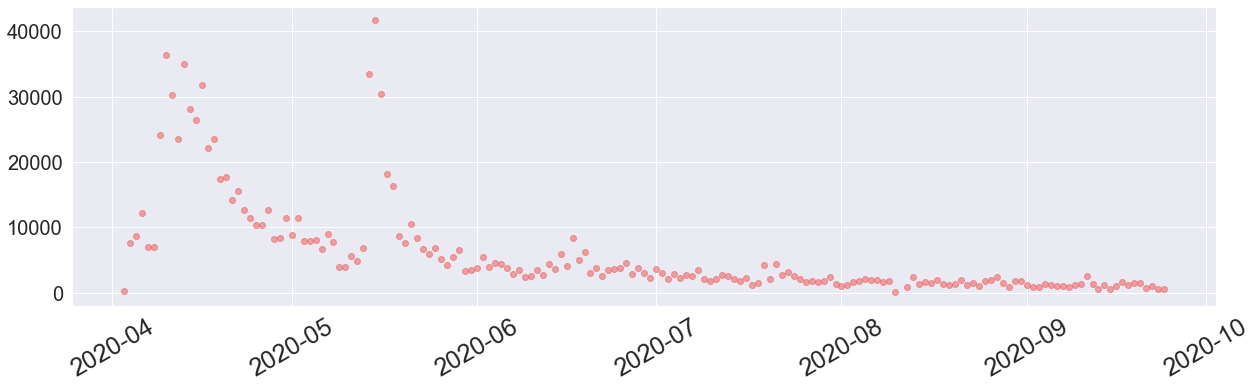

In [56]:
x = time1['Dates']
y = time1['kind']
plt.scatter(x, y,alpha = 0.5, color = '#ee5253')
fig = plt.gcf()
fig.set_size_inches(20.5, 5.5)
fig.savefig('test2png.png', dpi=100)

plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10
plt.xticks(rotation=30)

Interpretation:-

The data is from 2020-04-03 to 2020-09-24
We observe that there is high interation with the app on starting 2 months and gradually decreases.
The promotion for the app took places in the month of April and we can see a sudden fall in the same month,
this is because the UK entered lockdown due to covid. Once Season 2 was released on 8th  May we can see the spike in the interaction with the app.

In [57]:
# To create a separate dataframe for time
time2 = time['kind'].value_counts()
time2 = pd.DataFrame(time2).reset_index()


In [58]:
# TO group the interation of players based number of the times the interation is made.
time2 = time2.groupby("index")['kind'].sum()
time2 = pd.DataFrame(time2).reset_index()
time2=time2.sort_values("kind",ascending = False).head(5)
time2

,index,kind
46,move_viewed,201888
80,rolls_fastforwarded,187219
42,move_made,105410
22,home_to_gameplay,99692
52,online_game_to_home,83330


([0, 1, 2, 3, 4],
 [Text(0, 0, 'move_viewed'),
  Text(1, 0, 'rolls_fastforwarded'),
  Text(2, 0, 'move_made'),
  Text(3, 0, 'home_to_gameplay'),
  Text(4, 0, 'online_game_to_home')])

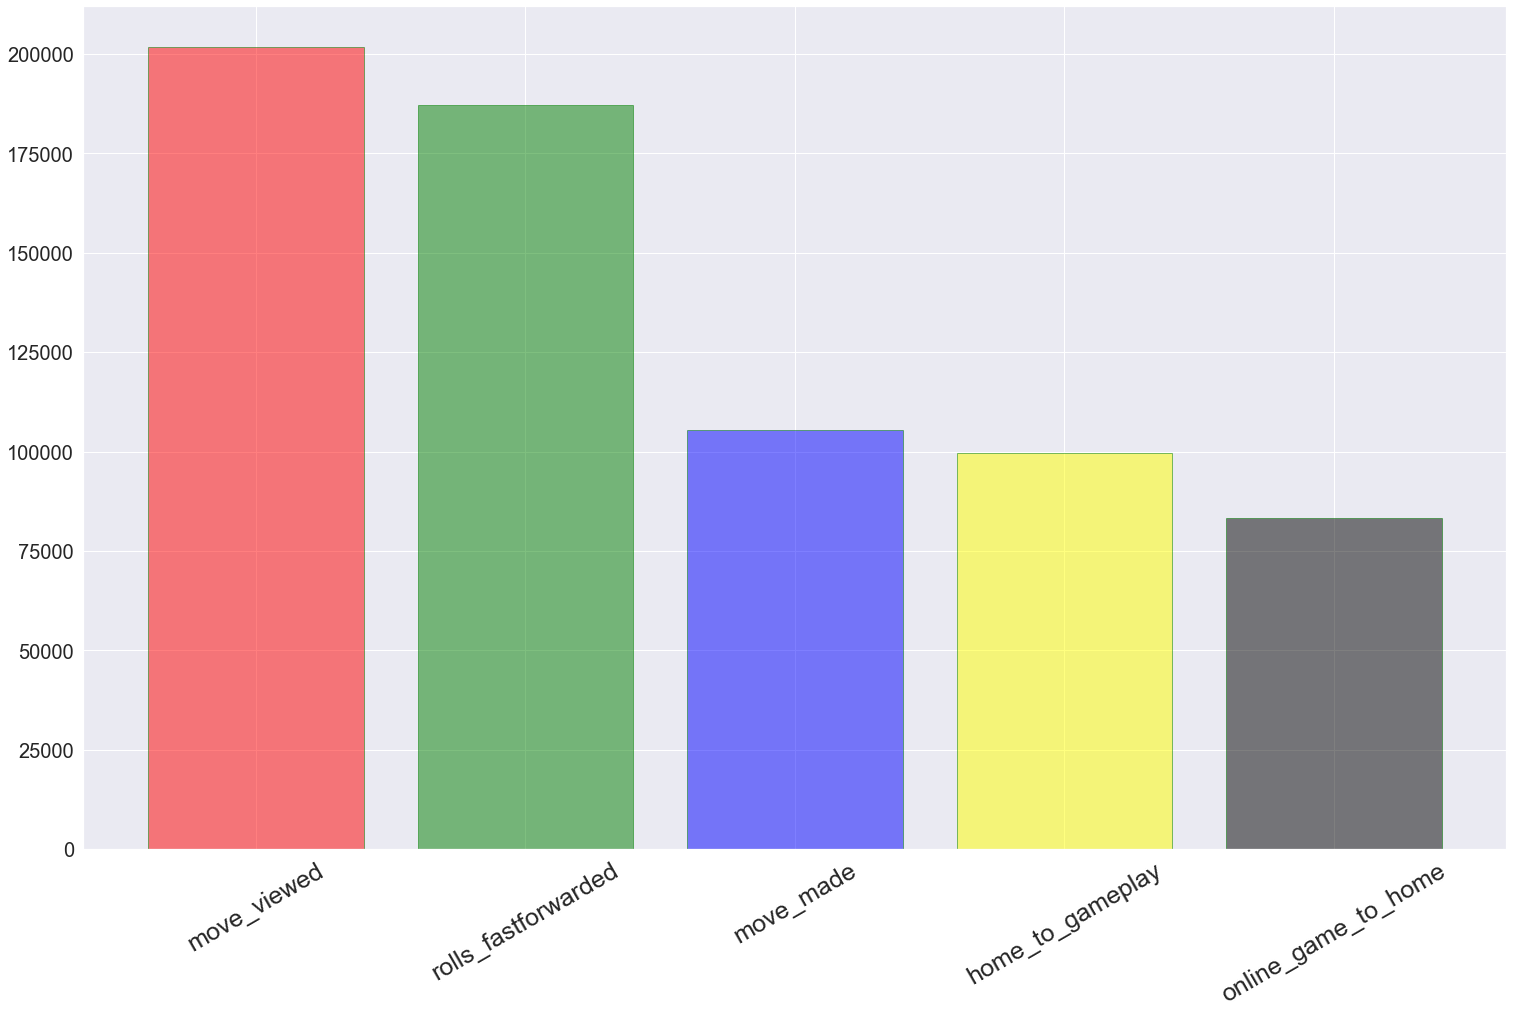

In [60]:
colors = ['red', 'green', 'blue', 'yellow', 'black', 'cyan','#feca57','#f368e0','#576574','#00d2d3']
plt.bar(time2['index'],time2['kind'],align='center', alpha=0.5,color = colors, edgecolor = 'green')

fig = plt.gcf()
fig.set_size_inches(25.5, 15.5)
fig.savefig('test2png.png', dpi=100)

plt.rc('font', size=10)
plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=20) 
plt.xticks(rotation=30)

#### Unique data with unique players details

In [61]:
# To remove duplicates
data_unique = df.drop_duplicates(subset = "Username")

In [62]:
print('Total no. of rows in dataset = {}'.format(data_unique.shape[0]))
print('Total no. of columns in dataset = {}'.format(data_unique.shape[1]))

Total no. of rows in dataset = 162
Total no. of columns in dataset = 16


In [67]:
# EXporting the data to do Temporal analysis of performance trend in tableau 
data_unique.to_csv('dataunique.csv')

In [64]:
data_unique.head(5)

,Username,kind,time,Played,Won,tag_bg,Games,count_character_has_won,count_character_has_been_played,accepting_games,skill_points,last_logged_in,badge_progressions,elo,lost_against,current_season_skill
1,probablytom,registration,2020-04-03 18:59:25.983000,263.0,137.0,nature,"[none, none, none, none, none]","{'K': 16, 'A': 33, 'R': 47, 'H': 33, 'W': 24, ...","{'K': 43, 'A': 70, 'R': 97, 'H': 54, 'W': 46, ...",True,5820.0,2020-09-24 11:49:51.178000,"[24, 16, 27, 33, 83, 47, 41, 33, 19, 24, 26, 5...",569.476881,"[cute320215, Mageofheart, BestWilliam, grobis,...",2469.0
20209,cptKav,home_screen_logout,2020-04-03 19:00:22.764000,498.0,233.0,nature,"[waiting, none, none, none, none]","{'K': 58, 'A': 92, 'R': 56, 'H': 53, 'W': 38, ...","{'K': 118, 'A': 183, 'R': 133, 'H': 102, 'W': ...",True,8606.0,2020-09-24 13:44:48.411000,"[51, 58, 111, 92, 67, 56, 44, 53, 46, 38, 66, ...",696.980879,"[demander, Mageofheart, BestWilliam, BestWilli...",4761.0
55991,BestWilliam,registration,2020-04-04 10:21:56.907000,50.0,32.0,cosmic,"[none, none, none, none, none]","{'K': 19, 'A': 1, 'R': 24, 'H': 3, 'W': 10, 'B...","{'K': 28, 'A': 2, 'R': 39, 'H': 5, 'W': 15, 'B...",True,1131.0,2020-04-08 09:18:38.737000,"[10, 19, 0, 1, 28, 24, 4, 3, 4, 10, 1, 3, 1, 3...",1262.801108,"[Ellen, Ellen, Ellen]",0.0
58963,Ellen,registration,2020-04-04 10:26:28.635000,690.0,345.0,oddysey,"[none, none, none, none, none]","{'K': 34, 'A': 29, 'R': 102, 'H': 42, 'W': 94,...","{'K': 64, 'A': 62, 'R': 199, 'H': 89, 'W': 172...",True,10151.0,2020-08-01 14:52:27.574000,"[29, 34, 42, 29, 114, 102, 81, 42, 151, 94, 19...",5853.154155,"[Marta, CalHaribo, Jules_217, CalHaribo, Gerr,...",5448.0
101841,Frp97,registration,2020-04-04 10:33:27.038000,737.0,436.0,blue,"[None, None, None, None, None]","{'K': 4, 'A': 0, 'R': 10, 'H': 2, 'W': 11, 'B'...","{'K': 8, 'A': 2, 'R': 16, 'H': 8, 'W': 26, 'B'...",True,15558.0,2020-09-24 12:22:33.903000,"[3, 4, 1, 0, 10, 10, 6, 2, 19, 11, 605, 421, 9...",11600.390763,"[asdf, LewisDyer, totem37, totem37, umachan, g...",12358.0


In [193]:
data_unique.describe()



,Played,Won,skill_points,elo,current_season_skill,winning_percent
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,92.950617,46.382716,1881.074074,1201.250846,1058.783951,43.684383
std,168.824758,86.539413,3164.775004,1774.154021,2295.416832,15.765701
min,1.000000,0.000000,0.000000,-11686.345065,0.000000,0.000000
25%,8.250000,4.000000,203.500000,1109.604974,0.000000,38.567500
50%,29.500000,14.000000,625.500000,1187.854099,80.500000,47.005000
75%,84.000000,38.500000,1847.000000,1212.790690,781.000000,52.757500
max,1004.000000,529.000000,16524.000000,11600.390763,12358.000000,72.730000


### Behaviour analysis

In [100]:
#top 10 usernames / players having highest elo scores on the games..
elo_username = data_unique.groupby("Username")['elo'].sum()
elo_username = pd.DataFrame(elo_username).reset_index()
elo_username=elo_username.sort_values("elo",ascending = False).head(10)
elo_username


,Username,elo
35,Frp97,11600.390763
99,apropos0,10481.733196
26,ECDr,6397.403469
29,Ellen,5853.154155
149,sstein,4599.350111
153,timri,3646.601009
31,Ezzey,3030.247077
4,Andy,2179.965229
57,Luca1802,2088.787123
122,georgedo,1683.888902


In [101]:
elo_username.describe()

,elo
count,10.000000
mean,5156.152103
std,3485.650199
min,1683.888902
25%,2392.535691
50%,4122.975560
75%,6261.341141
max,11600.390763


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Frp97'),
  Text(1, 0, 'apropos0'),
  Text(2, 0, 'ECDr'),
  Text(3, 0, 'Ellen'),
  Text(4, 0, 'sstein'),
  Text(5, 0, 'timri'),
  Text(6, 0, 'Ezzey'),
  Text(7, 0, 'Andy'),
  Text(8, 0, 'Luca1802'),
  Text(9, 0, 'georgedo')])

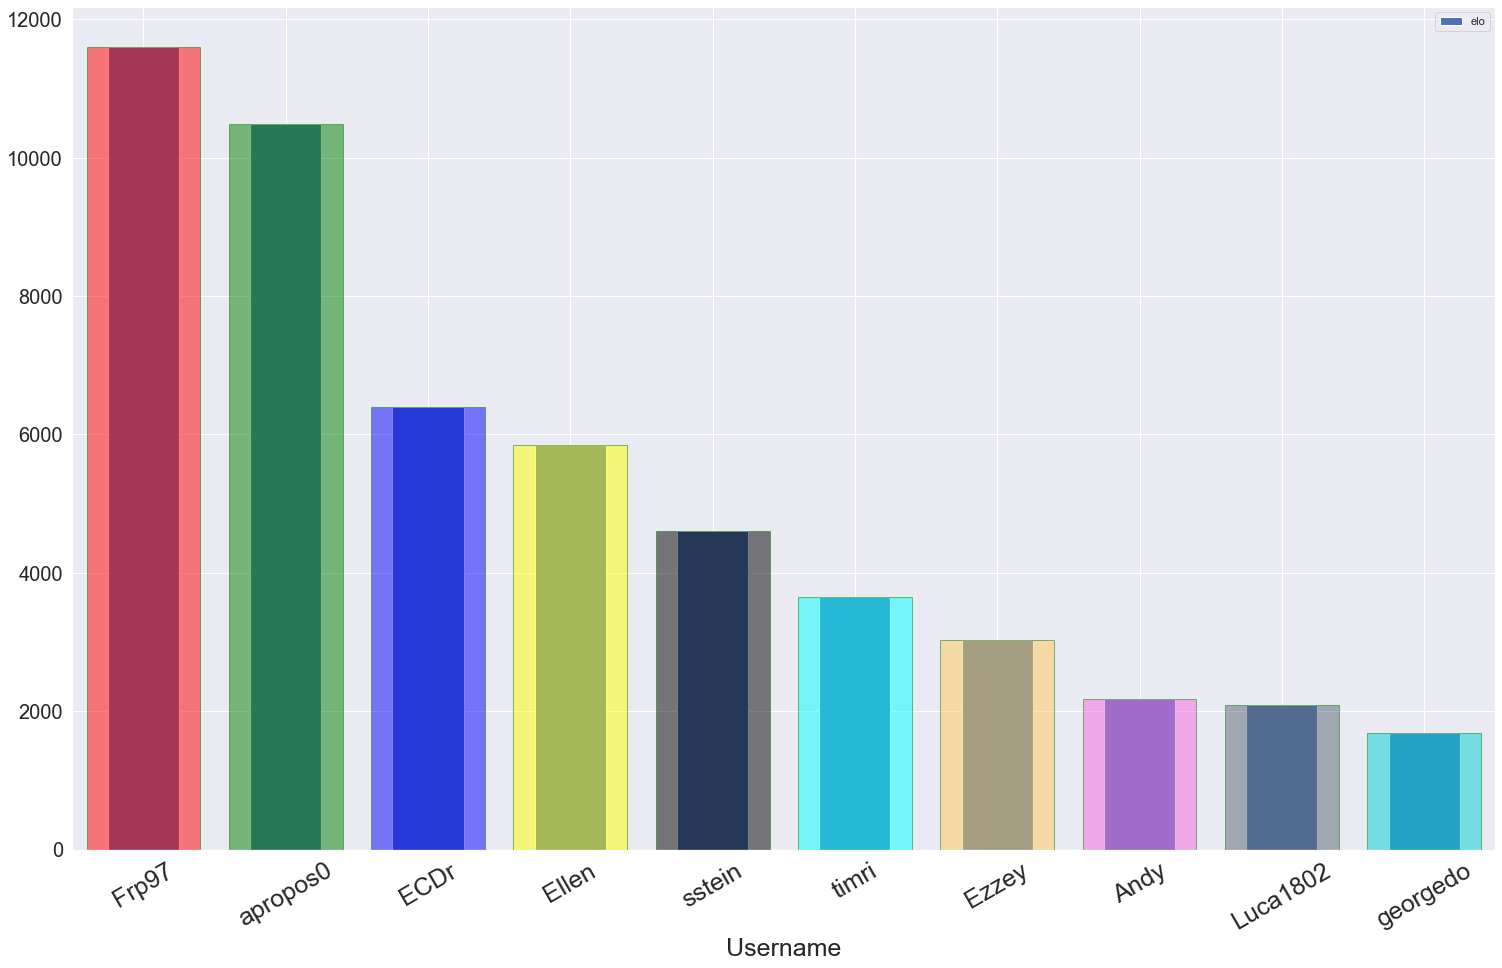

In [73]:
elo_username.plot.bar(x = 'Username', y = ('elo'))
plt.bar(elo_username['Username'],elo_username['elo'],align='center', alpha=0.5,color = colors, edgecolor = 'green')
colors = ['red', 'green', 'blue', 'yellow', 'black', 'cyan','#feca57','#f368e0','#576574','#00d2d3']
fig = plt.gcf()
fig.set_size_inches(25.5, 15.5)
fig.savefig('test2png.png', dpi=100)
plt.rc('axes', labelsize=25)
plt.xticks(rotation=30)

In [303]:
#top 10 usernames / players having highest skill points on the games..
skill_points_username = data_unique.groupby("Username")['skill_points'].sum()
skill_points_username = pd.DataFrame(skill_points_username).reset_index()
skill_points_username=skill_points_username.sort_values("skill_points",ascending = False).head(10)
skill_points_username


,Username,skill_points
99,apropos0,16524.0
35,Frp97,15558.0
130,l17r,15234.0
24,Deanerbeck,13656.0
57,Luca1802,11810.0
153,timri,11109.0
26,ECDr,10289.0
29,Ellen,10151.0
71,Nari,9660.0
111,cptKav,8606.0


In [304]:
skill_points_username.describe()

,skill_points
count,10.000000
mean,12259.700000
std,2785.353161
min,8606.000000
25%,10185.500000
50%,11459.500000
75%,14839.500000
max,16524.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'apropos0'),
  Text(1, 0, 'Frp97'),
  Text(2, 0, 'l17r'),
  Text(3, 0, 'Deanerbeck'),
  Text(4, 0, 'Luca1802'),
  Text(5, 0, 'timri'),
  Text(6, 0, 'ECDr'),
  Text(7, 0, 'Ellen'),
  Text(8, 0, 'Nari'),
  Text(9, 0, 'cptKav')])

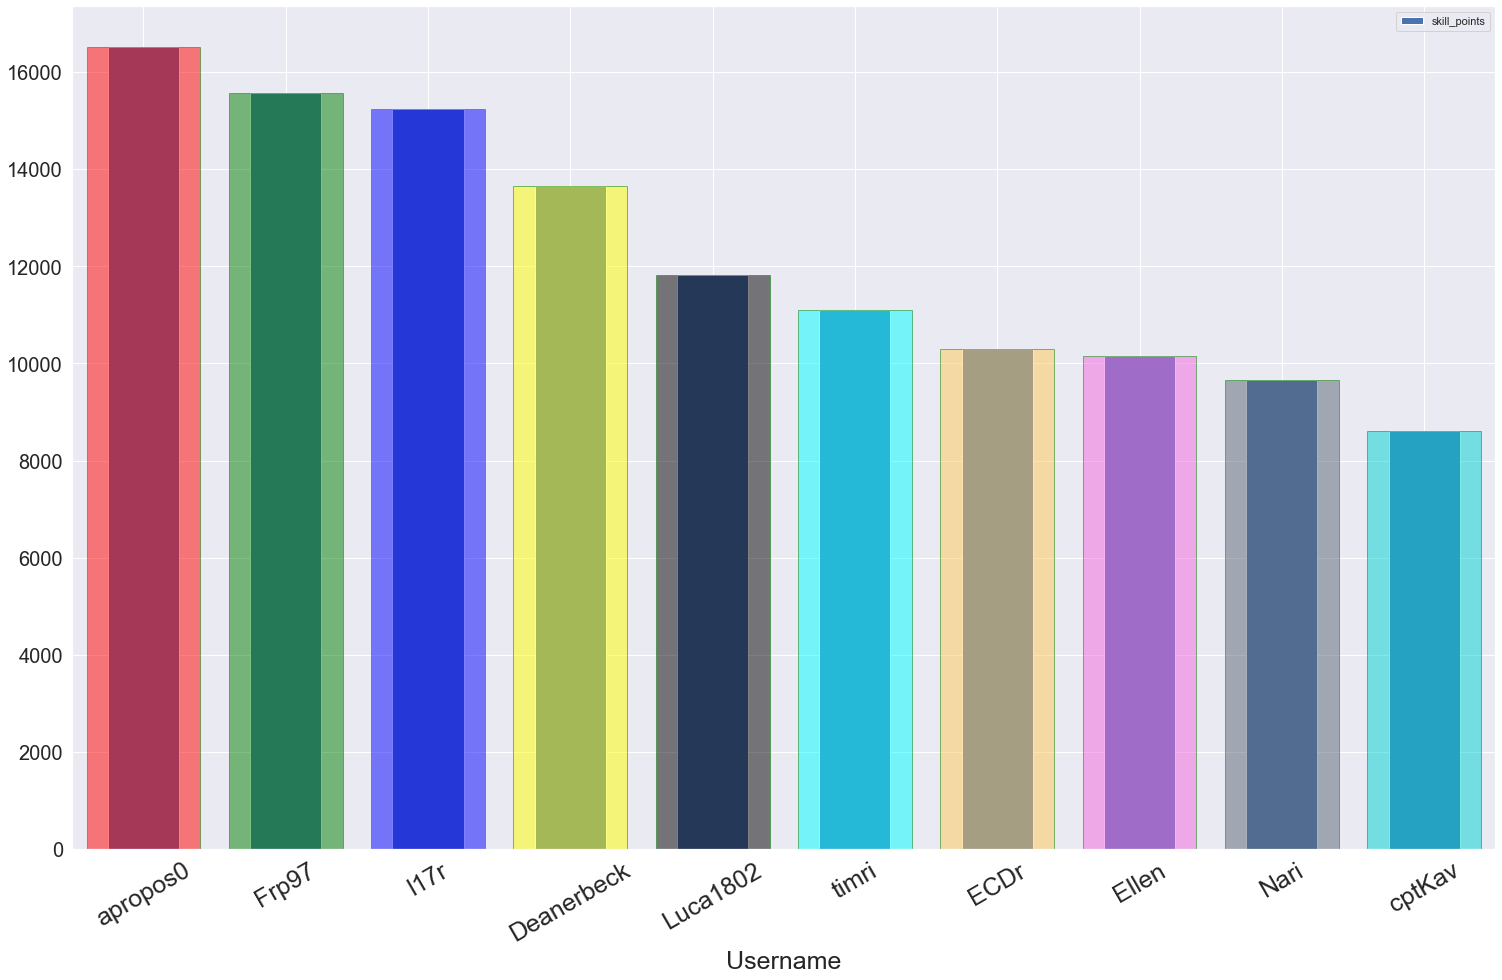

In [86]:
skill_points_username.plot.bar(x = 'Username', y = ('skill_points'))
plt.bar(skill_points_username['Username'],skill_points_username['skill_points'],align='center', alpha=0.5,color = colors, edgecolor = 'green')
colors = ['red', 'green', 'blue', 'yellow', 'black', 'cyan','#feca57','#f368e0','#576574','#00d2d3']
fig = plt.gcf()
fig.set_size_inches(25.5, 15.5)
fig.savefig('test2png.png', dpi=100)
plt.rc('axes', labelsize=25)
plt.xticks(rotation=30)

In [94]:
#top 10 usernames / players having highest scores on the games..
Played_username = data_unique.groupby("Username")['Played'].sum()
Played_username = pd.DataFrame(Played_username).reset_index()
Played_username=Played_username.sort_values("Played",ascending = False).head(10)
Played_username


,Username,Played
99,apropos0,1004.0
130,l17r,906.0
35,Frp97,737.0
29,Ellen,690.0
24,Deanerbeck,682.0
26,ECDr,561.0
112,creilly1,546.0
111,cptKav,498.0
71,Nari,474.0
153,timri,429.0


In [99]:
Played_username.describe()

,Played
count,10.000000
mean,652.700000
std,189.335123
min,429.000000
25%,510.000000
50%,621.500000
75%,725.250000
max,1004.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'apropos0'),
  Text(1, 0, 'l17r'),
  Text(2, 0, 'Frp97'),
  Text(3, 0, 'Ellen'),
  Text(4, 0, 'Deanerbeck'),
  Text(5, 0, 'ECDr'),
  Text(6, 0, 'creilly1'),
  Text(7, 0, 'cptKav'),
  Text(8, 0, 'Nari'),
  Text(9, 0, 'timri')])

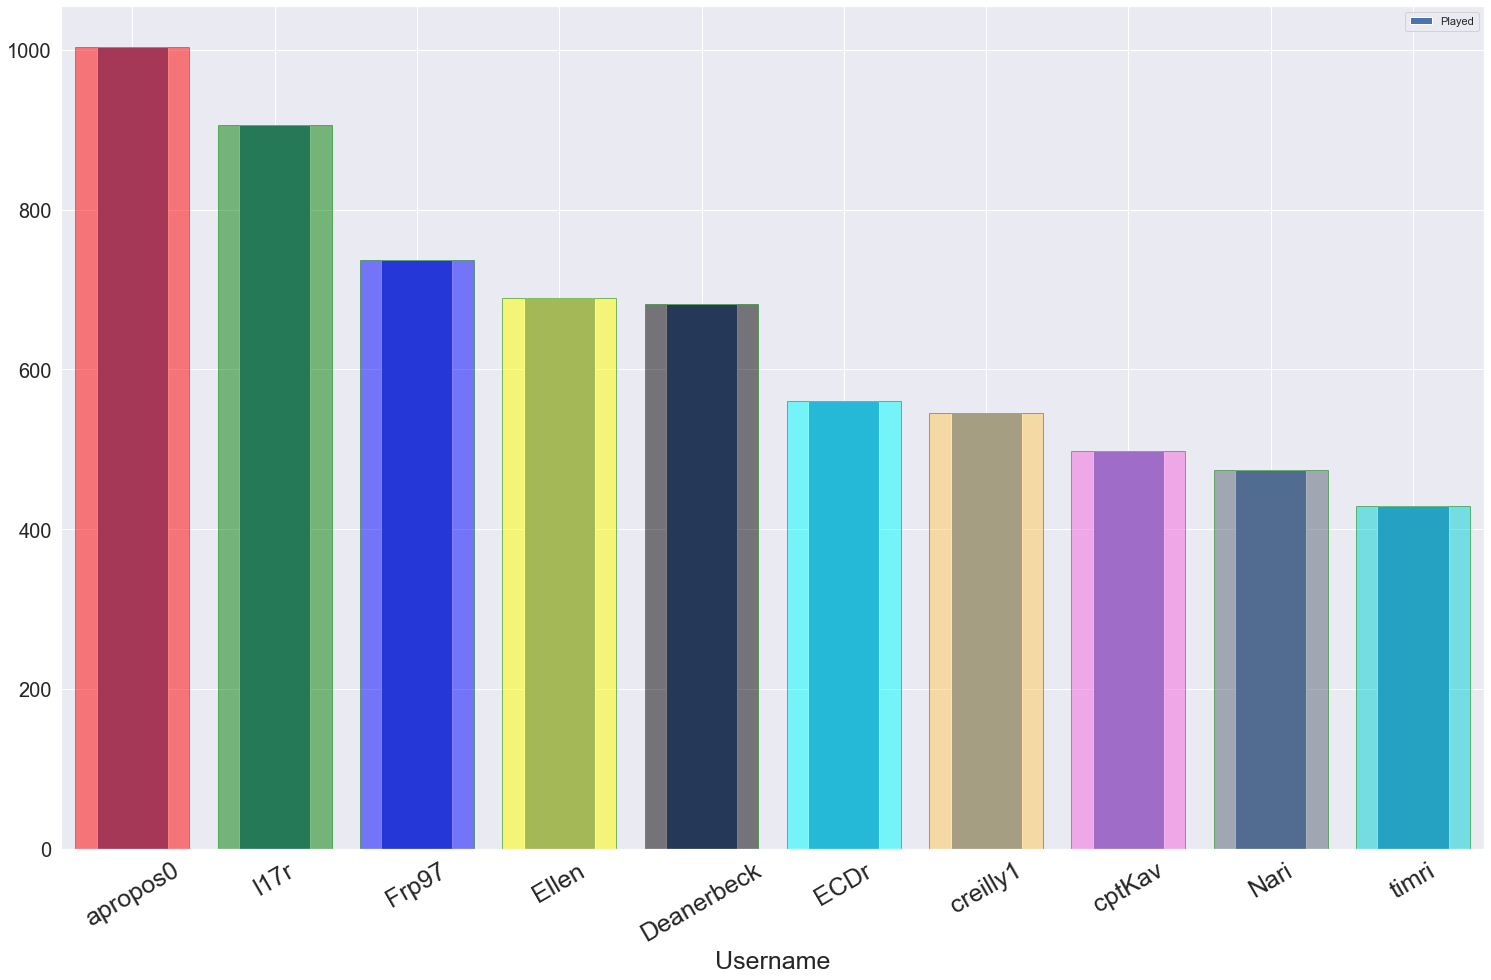

In [312]:
Played_username.plot.bar(x = 'Username', y = ('Played'))
plt.bar(skill_points_username['Username'],Played_username['Played'],align='center', alpha=0.5,color = colors, edgecolor = 'green')
colors = ['red', 'green', 'blue', 'yellow', 'black', 'cyan','#feca57','#f368e0','#576574','#00d2d3']
fig = plt.gcf()
fig.set_size_inches(25.5, 15.5)
fig.savefig('test2png.png', dpi=100)
plt.rc('axes', labelsize=25)
plt.xticks(rotation=30)

### separating each character in dictionary format to separate columns

In [77]:
type(data_unique['count_character_has_won'])

pandas.core.series.Series

In [78]:
character_won = data_unique[['count_character_has_won','Username']]
character_won
c = character_won.count_character_has_won.apply(pd.Series)
c = c.rename(columns={'K':'K_W','A':'A_W','R':'R_W','H':'H_W','W':'W_W','B':'B_W','M':'M_W','G':'G_W'})

In [79]:
character_played = data_unique[['count_character_has_been_played','Username']]
character_played
c1 = character_played.count_character_has_been_played.apply(pd.Series)
c1 = c1.rename(columns={'K':'K_P','A':'A_P','R':'R_P','H':'H_P','W':'W_P','B':'B_P','M':'M_P','G':'G_P'})

In [80]:
c1['sum'] =  c1["K_P"] + c1["A_P"] + c1["R_P"] + c1["H_P"] + c1["W_P"] + c1["B_P"] + c1["M_P"] + c1["G_P"] 
c1

,K_P,A_P,R_P,H_P,W_P,B_P,M_P,G_P,sum
1,43,70,97,54,46,94,48,66,518
20209,118,183,133,102,94,148,94,120,992
55991,28,2,39,5,15,3,3,1,96
58963,64,62,199,89,172,281,43,456,1366
101841,8,2,16,8,26,700,19,683,1462
...,...,...,...,...,...,...,...,...,...
1032860,8,8,3,6,1,0,0,0,26
1034326,0,1,0,1,0,0,0,0,2
1034621,44,5,29,3,11,40,28,14,174
1043941,108,51,57,51,82,53,58,186,646


In [81]:
data = data_unique.join(c)

In [82]:
data = data.join(c1)

In [83]:
data_final = data[['Played','Won','accepting_games','skill_points',
                  'elo','current_season_skill','K_W','A_W','R_W','H_W','W_W','B_W','M_W','G_W',
                  'K_P','A_P','R_P','H_P','W_P','B_P','M_P','G_P']]

### Modeling

In [139]:
# Choose your test size to split between training and testing sets:
Train, Test = train_test_split(data_final,  test_size=0.5, random_state=42)

In [143]:
Train_set = Train.copy()
Test_set = Test.copy()

In [144]:
Test_set["Clusters"] = ""

In [145]:
#standardize the train data to normal distribution

Train_set_standardized = preprocessing.scale(Train_set)
Train_set_standardized = pd.DataFrame(Train_set_standardized)

C:\Users\Srivi\Anaconda3\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


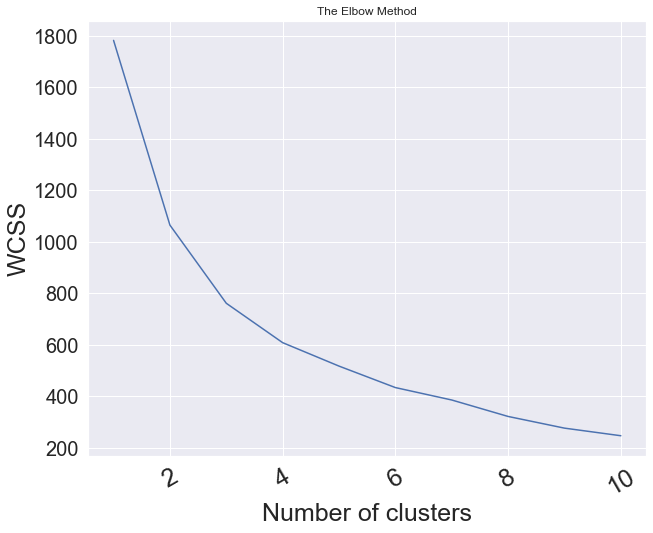

In [211]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, max_iter=300)
    kmeans.fit(Train_set_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


#plt.rc('font', size=10)
plt.rc('axes', labelsize=25)
#plt.rc('xtick', labelsize=25) 
#plt.rc('ytick', labelsize=20) 
plt.xticks(rotation=30)


plt.show()

In [149]:
Train_set['Cluster'] = cluster_2

### k-means clustering

In [166]:
# Choose your test size to split between training and testing sets:
Train_set2 = Train
Test_set2 = Test

In [167]:
Test_set2["Clusters"] = ""

In [168]:
#standardize the train data to normal distribution
Train_set_standardized2 = preprocessing.scale(Train_set2)
Train_set_standardized2 = pd.DataFrame(Train_set_standardized2)

In [197]:
kmeans = KMeans(n_clusters=2) # No. of clusters
kmeans.fit(Train_set_standardized2)

KMeans(n_clusters=2)

In [173]:
model = AgglomerativeClustering(n_clusters = 2, linkage = "average", affinity = 'cosine')


In [175]:
features = Train_set_standardized2
model.fit(features)

AgglomerativeClustering(affinity='cosine', linkage='average')

In [177]:
Clus_ = model.labels_
Train_set2['Cluster'] = Clus_

In [180]:
Train_set2.loc[Train_set2['Cluster'] == 1 , 'Clusters'] = 'Experts'
Train_set2.loc[Train_set2['Cluster'] != 1 , 'Clusters'] = 'Learners'

In [206]:
Train_set2.head(5)

,Played,Won,accepting_games,skill_points,elo,current_season_skill,K_W,A_W,R_W,H_W,...,K_P,A_P,R_P,H_P,W_P,B_P,M_P,G_P,Cluster,Clusters
707662,14.0,6.0,True,269.0,1191.996838,0.0,6,6,0,0,...,12,13,1,0,0,0,0,0,1,Experts
401396,21.0,10.0,True,457.0,1210.958847,0.0,1,1,9,1,...,2,1,16,4,4,2,9,0,1,Experts
820684,9.0,4.0,True,210.0,1180.887543,74.0,0,3,2,0,...,2,7,4,1,1,1,2,0,1,Experts
955758,228.0,91.0,True,5635.0,-451.316811,5485.0,16,50,6,7,...,25,119,18,25,130,15,20,98,0,Learners
1032860,13.0,7.0,True,380.0,909.860431,380.0,3,4,2,4,...,8,8,3,6,1,0,0,0,1,Experts


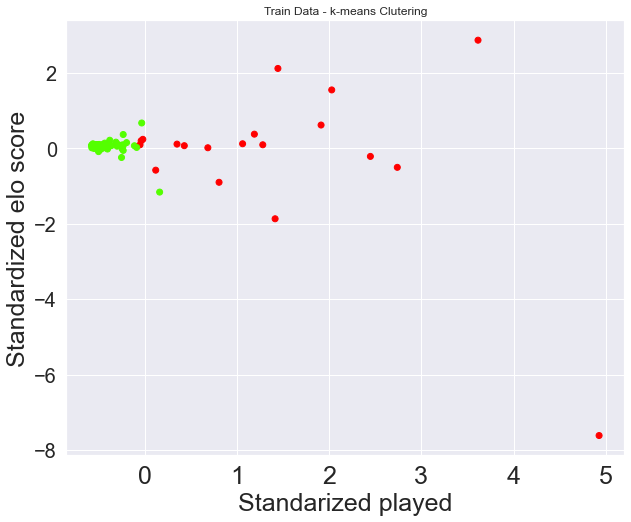

In [251]:
plt.figure(figsize=(10, 8))
plt.scatter(Train_set2_standardized.iloc[:,0], Train_set2_standardized.iloc[:,4],c=Clus_, cmap='prism')  # plot points with cluster dependent colors
plt.title('Train Data - k-means Clutering')
plt.xlabel('Standarized played')
plt.ylabel('Standardized elo score')
plt.show()

In [287]:
# Naive Bayes

X_Train_set2 = Train_set2.drop(['Clusters','Cluster'], axis=1)
Y_Train_set2 = Train_set2['Clusters']

X_Test_set2 = Test_set2.drop(['Clusters'], axis=1)
Y_Test_set2 = Test_set2['Clusters']

In [288]:
#Feature scaling

sc = StandardScaler()
X_train_2 = sc.fit_transform(X_Train_set2)
X_test_2 = sc.transform(X_Test_set2)



In [289]:
#Training the Naive Bayes model 
classifier2 = GaussianNB()
classifier2.fit(X_train_2, Y_Train_set2)

#Predict the Test Set Results
Y_Test_set_NB2  =  classifier2.predict(X_test_2)

Confusion matrix : 
 [[49 13]
 [12  7]]


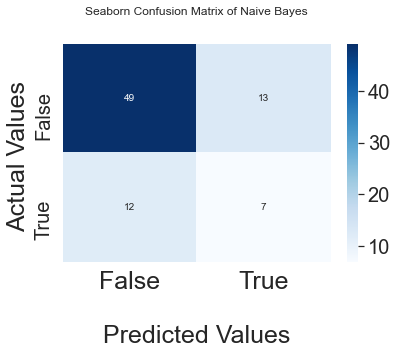

In [292]:
cm2_NB= confusion_matrix(Y_Train_set2, Y_Test_set_NB2)
print('Confusion matrix : \n',cm2_NB)


ax = sns.heatmap(cm2_NB, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix of Naive Bayes\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [294]:
# classification report for precision, recall f1-score and accuracy
cm_rf2 = classification_report(Y_Train_set2,Y_Test_set_RF,labels=['Experts','Learners'])
print('Classification report for Random Forest from K-means: \n',cm_rf2)

Classification report for Random Forest from K-means: 
               precision    recall  f1-score   support

     Experts       0.76      0.82      0.79        62
    Learners       0.21      0.16      0.18        19

    accuracy                           0.67        81
   macro avg       0.49      0.49      0.49        81
weighted avg       0.63      0.67      0.65        81



In [269]:
# Training the Support Vector Classsifier

classifier_SVM = SVC(kernel = 'rbf', random_state = 0)
classifier_SVM.fit(X_train_2, Y_Train_set2)

# Predict the Test Set Results
Y_Test_set_SVM2 = classifier.predict(X_test_2)


Confusion matrix : 
 [[50 12]
 [12  7]]


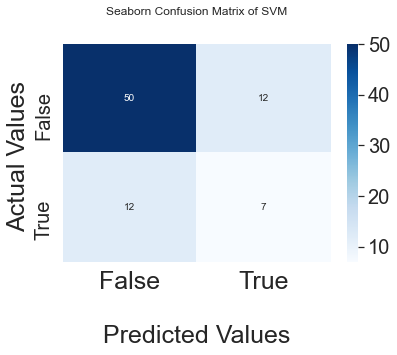

In [305]:
cm_SVM_2 = confusion_matrix(Y_Train_set2, Y_Test_set_SVM2)
print('Confusion matrix : \n',cm_SVM_2)

ax = sns.heatmap(cm_SVM_2, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix of SVM\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()

In [297]:
cm_svm2 = classification_report(Y_Train_set2,Y_Test_set_SVM2,labels=['Experts','Learners'])
print('Classification report of Support Vector from K-means: \n',cm_svm2)

Classification report of Support Vector from K-means: 
               precision    recall  f1-score   support

     Experts       0.81      0.81      0.81        62
    Learners       0.37      0.37      0.37        19

    accuracy                           0.70        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.70      0.70      0.70        81



In [267]:
# Training the Random Forest


rf2 = RandomForestClassifier()
rf2.fit(X_train_2, Y_Train_set2)

# Predict the Test Set Results
Y_Test_set_RF_2 = rf2.predict(X_test_2)

In [291]:
cm2_nb = classification_report(Y_Train_set2,Y_Test_set_NB2,labels=['Experts','Learners'])
print('Classification report of Naive Bayes from K-means: \n',cm2_nb)

Classification report of Naive Bayes from K-means: 
               precision    recall  f1-score   support

     Experts       0.80      0.79      0.80        62
    Learners       0.35      0.37      0.36        19

    accuracy                           0.69        81
   macro avg       0.58      0.58      0.58        81
weighted avg       0.70      0.69      0.69        81



Confusion matrix : 
 [[50 12]
 [12  7]]


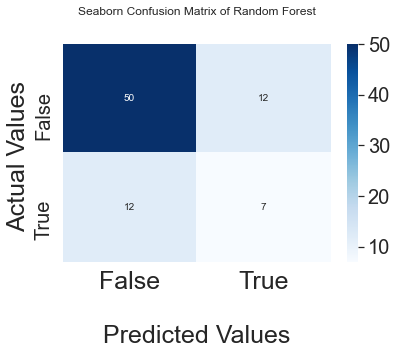

In [295]:
cm_RF2 = confusion_matrix(Y_Train_set2, Y_Test_set_RF_2)
print('Confusion matrix : \n',cm_RF2)

ax = sns.heatmap(cm_RF2, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix of Random Forest\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### Hierachical clustering

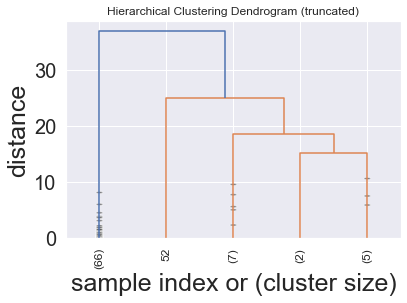

In [306]:
# Hierarchical clustering for the same train set
# creating a dataset for hierarchical clustering
Train_set3_standardized = Train_set_standardized

#  to  show the graphs inline
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  

#creating the linkage matrix
H_cluster = linkage(Train_set3_standardized,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    # show only the last p merged clusters
    truncate_mode='lastp',  
    # show only the last p merged clusters
    p=5,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    # to get a distribution impression in truncated branches
    show_contracted=True)
plt.show()

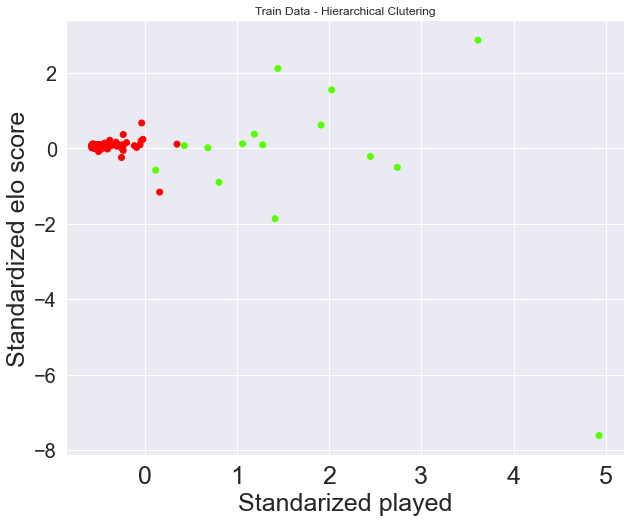

In [254]:
# Assigning the clusters and plotting the observations as per hierarchical clustering
k=2
cluster_2 = fcluster(H_cluster, k, criterion='maxclust')
cluster_2[0:30:,]
plt.figure(figsize=(10, 8))

# To plot points with cluster dependent colors
plt.scatter(Train_set3_standardized.iloc[:,0], Train_set3_standardized.iloc[:,4],c=cluster_2, cmap='prism')  
plt.title('Train Data - Hierarchical Clutering')
plt.xlabel('Standarized played')
plt.ylabel('Standardized elo score')
plt.show()

In [150]:
# Adding the cluster column to the train dataset
Train_set['Cluster'] = cluster_2

# Labelling the clusters in the train set
Train_set.loc[Train_set['Cluster'] == 1 , 'Clusters'] = 'Experts'
Train_set.loc[Train_set['Cluster'] != 1 , 'Clusters'] = 'Learners'

In [152]:
Train_set['Clusters'].value_counts()

Experts     66
Learners    15
Name: Clusters, dtype: int64

### Predicting models

In [153]:
X_Train_set = Train_set.drop(['Clusters','Cluster'], axis=1)
Y_Train_set = Train_set['Clusters']

X_Test_set = Test_set.drop(['Clusters'], axis=1)
Y_Test_set = Test_set['Clusters']

In [309]:
#Feature scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_Train_set)
X_test = sc.transform(X_Test_set)


In [259]:
#Training the Naive Bayes 
classifier = GaussianNB()
classifier.fit(X_train, Y_Train_set)

# Predict the Test Set Results
Y_Test_set_NB  =  classifier.predict(X_test)

Confusion matrix of Naive Bayes: 
 [[53 13]
 [ 9  6]]


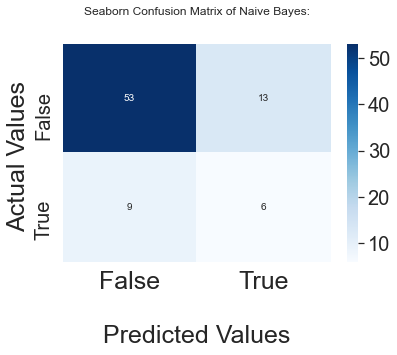

In [282]:
cm_NB= confusion_matrix(Y_Train_set, Y_Test_set_NB)
print('Confusion matrix of Naive Bayes: \n',cm_NB)

ax = sns.heatmap(cm_NB, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix of Naive Bayes:\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()




In [279]:
# classification report for precision, recall f1-score and accuracy
cm_nb = classification_report(Y_Train_set,Y_Test_set_NB,labels=['Experts','Learners'])
print('Classification report of Naive Bayes: \n',cm_nb)

Classification report of Naive Bayes: 
               precision    recall  f1-score   support

     Experts       0.85      0.80      0.83        66
    Learners       0.32      0.40      0.35        15

    accuracy                           0.73        81
   macro avg       0.59      0.60      0.59        81
weighted avg       0.76      0.73      0.74        81



In [263]:
# Training the Support Vector Classsifier


#Fit SVM to the Training set
classifier_SVM = SVC(kernel = 'rbf', random_state = 0)
classifier_SVM.fit(X_train, Y_Train_set)

# Predict the Test Set Results
Y_Test_set_SVM = classifier.predict(X_test)


Confusion matrix : 
 [[53 13]
 [ 9  6]]


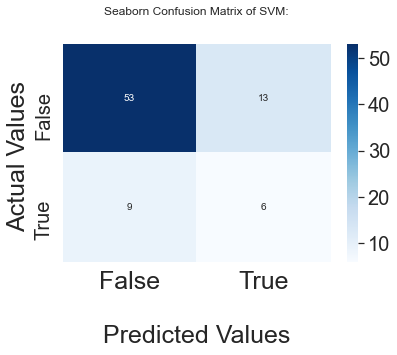

In [285]:
cm_SVM = confusion_matrix(Y_Train_set, Y_Test_set_SVM)
print('Confusion matrix : \n',cm_SVM)

ax = sns.heatmap(cm_SVM, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix of SVM:\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()


In [300]:
# classification report for precision, recall f1-score and accuracy
cm_svm  = classification_report(Y_Train_set,Y_Test_set_SVM,labels=['Experts','Learners'])
print('Classification report of Support Vector: \n',cm_svm)

Classification report of Support Vector: 
               precision    recall  f1-score   support

     Experts       0.85      0.80      0.83        66
    Learners       0.32      0.40      0.35        15

    accuracy                           0.73        81
   macro avg       0.59      0.60      0.59        81
weighted avg       0.76      0.73      0.74        81



In [261]:
# Training the Random Forest
rf = RandomForestClassifier()

# train the model
rf.fit(X_train, Y_Train_set)

# Predict the Test Set Results
Y_Test_set_RF = rf.predict(X_test)

Confusion matrix : 
 [[54 12]
 [13  2]]


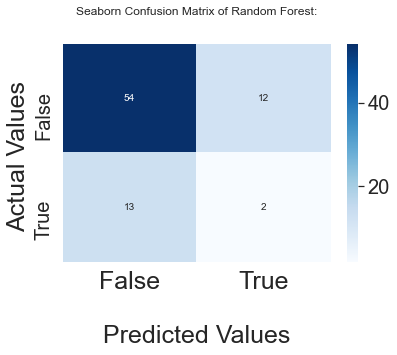

In [307]:
cm_RF = confusion_matrix(Y_Train_set, Y_Test_set_RF)
print('Confusion matrix : \n',cm_RF)


ax = sns.heatmap(cm_RF, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix of Random Forest:\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()



In [308]:
cm_rf = classification_report(Y_Train_set,Y_Test_set_RF,labels=['Experts','Learners'])
print('Classification report for Random Forest: \n',cm_rf)

Classification report for Random Forest: 
               precision    recall  f1-score   support

     Experts       0.81      0.82      0.81        66
    Learners       0.14      0.13      0.14        15

    accuracy                           0.69        81
   macro avg       0.47      0.48      0.47        81
weighted avg       0.68      0.69      0.69        81

